In [76]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import shuffle
sns.set_style("white")
%matplotlib inline

In [115]:
def generate_data(n, corr = .5, cts = True):
    
    # Unless you've taken linear algebra, don't worry about this block.
    A = np.array([[2,0],
                  [0,1]])
    W = np.array([[1, corr],
                  [corr ,1]])
    Sigma = A.dot(W)
    
    # Generates regressors. Argument cov is the "covariance matrix".
    regs = ss.multivariate_normal(mean = [20, 0], 
                               cov = Sigma).rvs(n)
    # First column is attend
    X = regs[:,0]
    # Second column is Z (forced to be zero or one)
    Z= regs[:,1]
    if not cts:
        Z = (Z > 0).astype(int)
    
    # Error term, independent from regressors
    eps = ss.norm(0, .2).rvs(n)
    
    # Forming Y
    sgn = np.random.choice([-1, 1])
    Y =  1 + sgn * .4 * X +  .5 * Z + eps
    
    # Forms the data set
    data = pd.DataFrame({'Z': Z, 'Y':Y, 'X':X})
    return data

In [116]:
def plot(df, ax, cts = True):
    if cts:
        colors = plt.cm.autumn_r(ss.norm.cdf(df["Z"]))
        sc = ax.scatter(df["X"], df["Y"], c = colors , s = 200, alpha = 1)
    else:
        ax.scatter(df["X"], df["Y"], c = df["Z"], s = 150, alpha = .5)

In [119]:
n = 100
dfs = [generate_data(n, 0, False),
       generate_data(n, .8, False),
       generate_data(n, -.8, False),
       generate_data(n, 0, True),
       generate_data(n, .8, True),
       generate_data(n, -.8, True)]

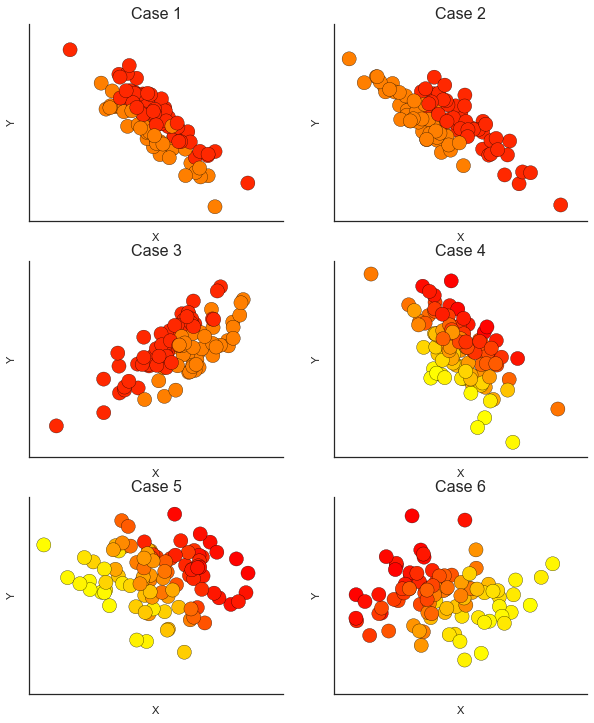

In [125]:
fig, axs = plt.subplots(3, 2, figsize = (10, 12));
for k, (ax, df) in enumerate(zip(axs.flatten(), dfs)): 
    plot(df, ax);
    ax.set_title("Case %d" % (k+1), fontsize = 16)
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
sns.despine()
fig.savefig("fig1")